# Amazon Fine Food Review  Analysis

## 1.Objective:

    Given a review text is positive or Negative.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import sqlite3
from sklearn.manifold import TSNE
from sklearn import decomposition
warnings.filterwarnings("ignore")

## 2.Data Cleaning

In [3]:
#connecting database

con=sqlite3.connect("database.sqlite")

# Read data from database

raw_data=pd.read_sql_query("""SELECT * FROM Reviews WHERE Score !=3 LIMIT 5000 """,con)

# Removal of Duplicates

pre_data=raw_data.drop_duplicates(['UserId','ProfileName','Time','Text'],keep="first")

# Removal of Unconditioning data (denominator>numerator)

pre_data=pre_data[pre_data.HelpfulnessNumerator<=pre_data.HelpfulnessDenominator]
filter_data=pre_data

# Raw data shape and after removing duplicates pre_data shape

print(raw_data.shape)
print(pre_data.shape)
print(filter_data.shape)

(5000, 10)
(4986, 10)
(4986, 10)


In [4]:
# Class Label changing
a=[]
for i in pre_data["Score"]:
    if i<3:
        a.append('Negative')
    else:
        a.append("Positive")
filter_data['Score'] = a

In [5]:
filter_data["Score"].value_counts()

Positive    4178
Negative     808
Name: Score, dtype: int64

In [6]:
#After Data Cleaning the filter_data becomes

filter_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,Positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,Positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,Positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,Positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,Positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


## 3. Text Preprocesing

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

#### 3.1. Removing html tags

In [8]:
# References
# https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44

html_tag_removed_data=[]
for i in filter_data['Text'].values:
    a=re.sub("<.*?>"," ",i)
    html_tag_removed_data.append(a)
print("Before HTML tag removal")
print("________________________")
print(" ")
print(filter_data['Text'].values[900])
print("="*125)
print("After HTML tag removal")
print("________________________")
print(" ")
print(html_tag_removed_data[900])

Before HTML tag removal
________________________
 
My primary point with this review is to note that this packaging is less expensive than the other size offered by Folger. You get more coffee for less money.<br /><br />  I recently started drinking coffee again after a lapse of many years. Since I didn't know how many cups a day I would use, I wanted to avoid the fuss of a coffeemaker. I don't particularly like instant coffee. I was delighted to find these Folger's bags.<br /><br />  They brew a very nice tasting cup of coffee. I'm not any kind of coffee expert, so I don't know what special terms might be used. All I know is that if I let the bag seep for a bit more than a minute, it sure tastes good. Thanks to my very much better half, I've also learned that each of these bags will produce at least two good cups of coffee.<br /><br />  Very convenient, very easy, very tasty. I intend to take some of these with me when I travel as an alternative to the in-room coffee makers or (yeck!)

#### 3.2. Removing url

In [9]:
# References
#https://stackoverflow.com/a/40823105/4084039

url_removed_data=[]
for i in html_tag_removed_data:
    b=re.sub(r"http\S+"," ",i)
    url_removed_data.append(b)
url_removed_data[60]  

'For those of us on a low carb diet these little tablets are just the thing.  Two years ago I started cycling again after many years but was having heart arrhythmia after longer rides in high heat.  I was drinking plain water but did a little research and thought electrolytes might be the issue.  Gatorade wasn\'t an option because it is so loaded with carbohydrates so I looked around for a low-carb alternative.  The "zero carb" sports drinks didn\'t help so what to do?  One day I ran across these at my bike shop so tried a tube of them.....voila!...problem solved!!  I\'ve shared them with two friends in particular whose problems with leg cramps were resolved while using these.  These guys got it right -- they are superbly formulated and simply work.....'

#### 3.3. Expanding english language contractions 

In [10]:
# References
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

decontracted_data=[]
for i in url_removed_data:
    c=decontracted(i)
    decontracted_data.append(c)
print("Before decontracted")
print("________________________")
print(" ")
print(url_removed_data[60])
print("="*125)
print("After decontracted")
print("________________________")
print(" ")
print(decontracted_data[60])

Before decontracted
________________________
 
For those of us on a low carb diet these little tablets are just the thing.  Two years ago I started cycling again after many years but was having heart arrhythmia after longer rides in high heat.  I was drinking plain water but did a little research and thought electrolytes might be the issue.  Gatorade wasn't an option because it is so loaded with carbohydrates so I looked around for a low-carb alternative.  The "zero carb" sports drinks didn't help so what to do?  One day I ran across these at my bike shop so tried a tube of them.....voila!...problem solved!!  I've shared them with two friends in particular whose problems with leg cramps were resolved while using these.  These guys got it right -- they are superbly formulated and simply work.....
After decontracted
________________________
 
For those of us on a low carb diet these little tablets are just the thing.  Two years ago I started cycling again after many years but was having 

#### 3.4. Removing  alpha-numeric

In [11]:
# References
# https://stackoverflow.com/questions/18082130/python-regex-to-remove-all-words-which-contains-number/18082370#18082370

alpha_numeric_removed_data=[]
for i in decontracted_data:
    d=re.sub("\S*\d\S*", " ",i)
    alpha_numeric_removed_data.append(d)
print("Before removal of Alpha-Numeric")
print("________________________")
print(" ")
print(decontracted_data[25])
print("="*125)
print("After removal of Alpha-Numeric")
print("________________________")
print(" ")
print(alpha_numeric_removed_data[25])

Before removal of Alpha-Numeric
________________________
 
Product received is as advertised.   Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6) 
After removal of Alpha-Numeric
________________________
 
Product received is as advertised.   Twizzlers, Strawberry,   Bags (Pack of   


#### 3.5. Removing  Special Characters

In [12]:
# References
# https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string/5843547#5843547

special_char_removed_data=[]
for i in alpha_numeric_removed_data:
    e=re.sub('[^A-Za-z0-9]+', ' ',i)
    special_char_removed_data.append(e)
print("Before removal of Special Character")
print("________________________")
print(" ")
print(alpha_numeric_removed_data[25])
print("="*125)
print("After removal of Special Character")
print("________________________")
print(" ")
print(special_char_removed_data[25])

Before removal of Special Character
________________________
 
Product received is as advertised.   Twizzlers, Strawberry,   Bags (Pack of   
After removal of Special Character
________________________
 
Product received is as advertised Twizzlers Strawberry Bags Pack of 


#### 3.6. Removing Stop Words

In [13]:
# References 
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# # https://gist.github.com/sebleier/554280

stopwords= set(['since','br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

stopword_removed_data=[]
for i in special_char_removed_data:
    s=[]
    for w in i.split():
        if w.lower() not in stopwords:
            s.append(w.lower())
    stopword_removed_data.append(" ".join(s))
print("Before removal of Stop Words")
print("________________________")
print(" ")
print(special_char_removed_data[900])
print("="*125)
print("After removal of Stop words")
print("________________________")
print(" ")
print(stopword_removed_data[900])

Before removal of Stop Words
________________________
 
My primary point with this review is to note that this packaging is less expensive than the other size offered by Folger You get more coffee for less money I recently started drinking coffee again after a lapse of many years Since I did not know how many cups a day I would use I wanted to avoid the fuss of a coffeemaker I do not particularly like instant coffee I was delighted to find these Folger is bags They brew a very nice tasting cup of coffee I am not any kind of coffee expert so I do not know what special terms might be used All I know is that if I let the bag seep for a bit more than a minute it sure tastes good Thanks to my very much better half I have also learned that each of these bags will produce at least two good cups of coffee Very convenient very easy very tasty I intend to take some of these with me when I travel as an alternative to the in room coffee makers or yeck vending machines Jerry
After removal of Stop w

#### 3.7. Stemming

In [14]:
# References
# stemming tutorial: https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
# Lemmatisation tutorial: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
# NLTK Stemming package list: https://www.nltk.org/api/nltk.stem.html

from nltk.stem.snowball import EnglishStemmer
stemmer=EnglishStemmer()
final_data=[]
for i in stopword_removed_data:
    k=[]
    for w in i.split():
        s=(stemmer.stem(w)).encode('utf8')
        k.append(s)
    final_data.append(b' '.join(k).decode())
print("Before Stemming")
print("________________________")
print(" ")
print(stopword_removed_data[900])
print("="*125)
print("After Stemming")
print("________________________")
print(" ")
print(final_data[900])

Before Stemming
________________________
 
primary point review note packaging less expensive size offered folger get coffee less money recently started drinking coffee lapse many years not know many cups day would use wanted avoid fuss coffeemaker not particularly like instant coffee delighted find folger bags brew nice tasting cup coffee not kind coffee expert not know special terms might used know let bag seep bit minute sure tastes good thanks much better half also learned bags produce least two good cups coffee convenient easy tasty intend take travel alternative room coffee makers yeck vending machines jerry
After Stemming
________________________
 
primari point review note packag less expens size offer folger get coffe less money recent start drink coffe laps mani year not know mani cup day would use want avoid fuss coffeemak not particular like instant coffe delight find folger bag brew nice tast cup coffe not kind coffe expert not know special term might use know let bag seep

In [15]:
process_data=filter_data
process_data.Text=final_data

In [18]:
# After completion of Text pre-processing

process_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,great taffi great price wide assort yummi taff...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,Positive,1342051200,Nice Taffy,got wild hair taffi order five pound bag taffi...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,Positive,1340150400,Great! Just as good as the expensive brands!,saltwat taffi great flavor soft chewi candi in...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,Positive,1336003200,"Wonderful, tasty taffy",taffi good soft chewi flavor amaz would defini...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,Positive,1322006400,Yay Barley,right most sprout cat eat grass love rotat aro...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,Positive,1351209600,Healthy Dog Food,healthi dog food good digest also good small p...


## 4. Summry Preprocessing

In [27]:
summary_raw_data=process_data.Summary

In [28]:
summary_data=[]
for i in summary_raw_data:
# removing of HTML tags
    a=re.sub("<.*?>"," ",i)
# removing url
    b=re.sub(r"http\S+"," ",a)
# expanding contractions
    c=decontracted(b)
# removing Special characters
    e=re.sub('[^A-Za-z0-9]+', ' ',c)
# removing stopwords
    k=[]
    for w in e.split():
        if w.lower() not in stopwords:
            s=(stemmer.stem(w.lower())).encode('utf8')
            k.append(s)
    summary_data.append(b' '.join(k).decode())

In [39]:
print("Before Summary Preprocessing")
print("____________________________")
print(" ")
print(summary_raw_data[10])
print("="*125)
print("After Summary Preprocessing")
print("____________________________")
print(" ")
print(summary_data[10])

Before Summary Preprocessing
____________________________
 
The Best Hot Sauce in the World
After Summary Preprocessing
____________________________
 
best hot sauc world


## 5. Featurization and TSNE

#### 5.1. Bag Of Words

#### 5.1.1. Featurization of Bag of Word

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Reference
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vector=CountVectorizer(ngram_range=(1,2))
bow_data=vector.fit_transform(process_data.Text)
print("Shape of the bow")
print(bow_data.get_shape())
print("="*125)
print("Number of unique words")
print(bow_data.get_shape()[1])
print("="*125)
print("Type of matrix")
print(type(bow_data))

Shape of the bow
(4986, 123052)
Number of unique words
123052
Type of matrix
<class 'scipy.sparse.csr.csr_matrix'>


In [18]:
# References
#sparse matrix to dense matrix
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.todense.html

bow_dense_data=bow_data.todense()

In [19]:
print("After conversion of sparse matrix into dense matrix")
type(bow_dense_data)

After conversion of sparse matrix into dense matrix


numpy.matrixlib.defmatrix.matrix

#### 5.1.2 TSNE of Bag of Words

In [41]:
from sklearn.manifold import TSNE

In [24]:
bow_label=process_data.Score

In [22]:
#tsne of perplexity=10, #of iterations=5000

bow_model=TSNE(n_components=2,random_state=0,n_iter=5000,perplexity=10)
bow_tsne_data=bow_model.fit_transform(bow_dense_data)

In [27]:
bow_tsne=np.vstack((bow_tsne_data.T,bow_label.T)).T

In [30]:
# creating a DataFrame

bow_tsne_df=pd.DataFrame(data=bow_tsne,columns=['Text Vector1','Text Vector2','Score'])

In [31]:
# TSNE BOW vector

bow_tsne_df

,Text Vector1,Text Vector2,Score
0,12.6245,-8.81048,Positive
1,5.89994,-10.4146,Negative
2,-8.61202,-20.3807,Positive
3,-14.488,-2.97547,Negative
4,-5.77284,-4.51828,Positive
5,-23.3917,13.6235,Positive
6,-7.36109,2.29553,Positive
7,-6.63178,1.76292,Positive
8,38.416,6.92137,Positive
9,42.7032,-16.7498,Positive


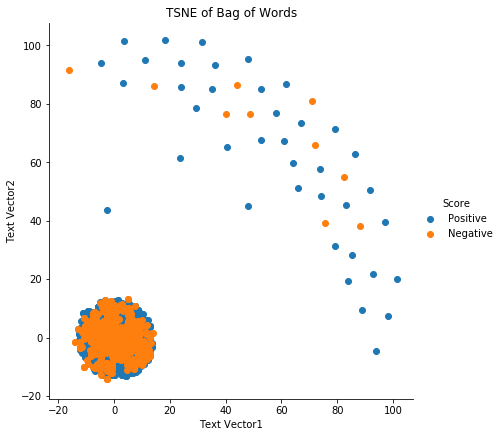

In [104]:
# Plotting of BOW_TSNE_DF

plt.close()
sns.FacetGrid(bow_tsne_df,hue='Score',size=6).map(plt.scatter,'Text Vector1','Text Vector2').add_legend()
plt.title("TSNE of Bag of Words")
plt.show()

### Observation:

* After applying TSNE on Bag of Words, The Positive and negative Reviews are Not well seperated.They are all overlapped.

In [33]:
#tsne of perplexity=30, #of iterations=5000

bow_model=TSNE(n_components=2,random_state=0,n_iter=5000,perplexity=30)
bow_tsne_data=bow_model.fit_transform(bow_dense_data)

In [34]:
bow_tsne=np.vstack((bow_tsne_data.T,bow_label.T)).T

In [35]:
# creating a DataFrame

bow_tsne_df=pd.DataFrame(data=bow_tsne,columns=['Text Vector1','Text Vector2','Score'])

In [37]:
# TSNE BOW vector

bow_tsne_df

,Text Vector1,Text Vector2,Score
0,5.0105,-1.6669,Positive
1,4.13685,-0.0271266,Negative
2,-2.18806,-4.36795,Positive
3,0.858602,1.4232,Negative
4,2.10121,-2.35663,Positive
5,-3.58101,5.10402,Positive
6,-1.39716,1.26875,Positive
7,-1.37003,0.994848,Positive
8,6.94576,-6.30682,Positive
9,11.7663,-3.42391,Positive


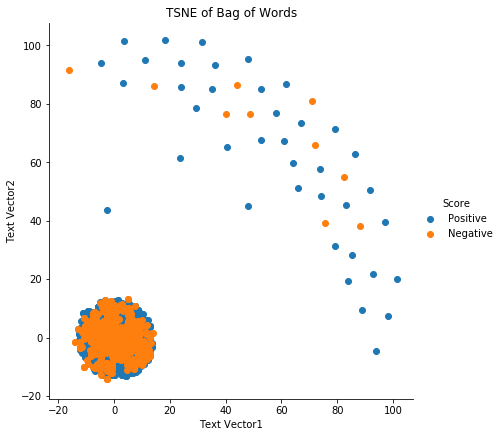

In [103]:
# Plotting of BOW_TSNE_DF

plt.close()
sns.FacetGrid(bow_tsne_df,hue='Score',size=6).map(plt.scatter,'Text Vector1','Text Vector2').add_legend()
plt.title("TSNE of Bag of Words")
plt.show()

### Observation:

* After applying TSNE on Bag of Words, the Positive and Negative reviews are not well seperated. They are all Overlapped.

#### 5.2. TFIDF

#### 5.2.1. Featurization of TFIDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf_label=process_data.Score

In [43]:
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

tfidf_model=TfidfVectorizer(ngram_range=(1,2),min_df=5)
tfidf_data=tfidf_model.fit_transform(process_data.Text)
print("The shape of TFIDF Vector")
print(tfidf_data.get_shape())
print("="*125)
print("The Number of unique words")
print(tfidf_data.get_shape()[1])
print("="*125)
print("Type of TFIDF")
print(type(tfidf_data))

The shape of TFIDF Vector
(4986, 6757)
The Number of unique words
6757
Type of TFIDF
<class 'scipy.sparse.csr.csr_matrix'>


In [45]:
# the conversion of sparse to dense matrix

tfidf_dense_data=tfidf_data.todense()
print("After conversion of sparse to dence matrix")
print(type(tfidf_dense_data))

After conversion of sparse to dence matrix
<class 'numpy.matrixlib.defmatrix.matrix'>


#### 5.2.2. TSNE of TFIDF

In [57]:
tfidf_tsne=TSNE(n_components=2,perplexity=50,n_iter=5000)
tfidf_tsne_data=tfidf_tsne.fit_transform(tfidf_dense_data)

In [59]:
tfidf_tsne_stack_data=np.vstack((tfidf_tsne_data.T,tfidf_label.T)).T

In [60]:
# Creating a DataFrame

tfidf_tsne_final_data=pd.DataFrame(tfidf_tsne_stack_data,columns=["TFIDF Vector1","TFIDF Vector2","Score"])
tfidf_tsne_final_data

,TFIDF Vector1,TFIDF Vector2,Score
0,11.4229,59.489,Positive
1,-26.9695,14.5584,Negative
2,25.9373,43.9935,Positive
3,-50.8528,-7.78364,Negative
4,-29.069,5.082,Positive
5,-29.073,5.14167,Positive
6,-17.8901,6.68575,Positive
7,-29.6463,4.09358,Positive
8,8.27689,81.6981,Positive
9,29.5378,62.0367,Positive


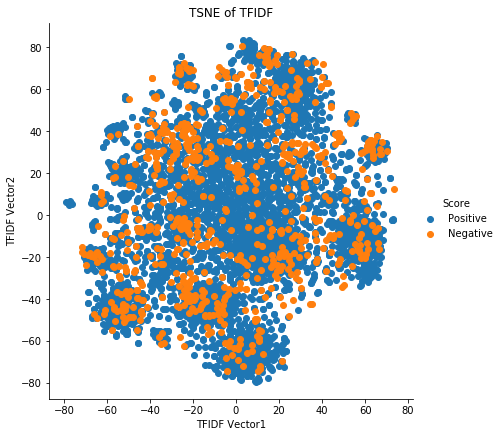

In [102]:
# Plotting

plt.close()
sns.FacetGrid(tfidf_tsne_final_data,hue="Score",size=6).map(plt.scatter,"TFIDF Vector1","TFIDF Vector2").add_legend()
plt.title("TSNE of TFIDF")
plt.show()

### Observation:

* After applying TSNE on TFIDF, the Positive and Negative reviews are not well seperated. They are all Overlapped.

#### 5.3. Word2Vec

#### 5.3.1. Featurization of Word2Vec

In [63]:
# References
# https://radimrehurek.com/gensim/models/word2vec.html
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY

from gensim.models import Word2Vec

In [64]:
# Getting words list

list_sentense=[]
for i in final_data:
    list_sentense.append(i.split())

In [68]:
word2vec=Word2Vec(list_sentense,min_count=5,size=50,workers=4)

In [79]:
print("Trained word2vec similarity example")
print("___________________________________")
print(" ")
print(word2vec.wv.most_similar('like'))

Trained word2vec similarity example
___________________________________
 
[('tast', 0.9772348403930664), ('spici', 0.9755844473838806), ('strong', 0.9743541479110718), ('bitter', 0.9722602963447571), ('realli', 0.9719998836517334), ('rich', 0.9685072898864746), ('light', 0.9653646945953369), ('sweet', 0.9625106453895569), ('smooth', 0.9615814089775085), ('flavor', 0.9605270624160767)]


In [83]:
word2vec_words=list(word2vec.wv.vocab)
print(" Number of words")
print("_________________")
print(" ")
print(len(word2vec_words))
print("="*125)
print(" sample words")
print("_________________")
print(" ")
print(word2vec_words[0:10])

 Number of words
_________________
 
3034
 sample words
_________________
 
['bought', 'sever', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'look']


#### 5.4. Average Word2Vec

#### 5.4.1. Featurization of Avg Word2Vec

In [94]:
# Reference
# formula of Avg word2vec = sum of all (wi)[i=0 to n]/n

avg_word2vec=[]
for i in list_sentense:
    vector=np.zeros(50)
    no_of_words=0
    for k in i:
        if w in k:
            w2v_data=word2vec.wv[w]
            vector=vector+w2v_data
            no_of_words=no_of_words+1
    if no_of_words != 0:
        vector=vector/no_of_words
    avg_word2vec.append(vector)  
print("Size of Avg Word2vec")
print(len(avg_word2vec))
print("Size of Vector")
print(len(avg_word2vec[0]))

Size of Avg Word2vec
4986
Size of Vector
50


#### 5.4.2. TSNE of Avg Word2Vec

In [95]:
avg_w2v_model=TSNE(n_components=2,perplexity=50,n_iter=5000)
avg_w2v=avg_w2v_model.fit_transform(avg_word2vec)

In [98]:
avg_w2v_label=process_data.Score

In [99]:
avg_w2v_stack=np.vstack((avg_w2v.T,avg_w2v_label.T)).T

In [106]:
# Creating DataFrame

avg_w2v_final=pd.DataFrame(avg_w2v_stack,columns=["Avg Vector1","Avg Vector2","Score"])
avg_w2v_final

,Avg Vector1,Avg Vector2,Score
0,0.128313,-0.0262415,Positive
1,0.128313,-0.0262415,Negative
2,0.128313,-0.0262399,Positive
3,0.128313,-0.0262415,Negative
4,0.128313,-0.0262399,Positive
5,0.128313,-0.0262399,Positive
6,0.128313,-0.0262415,Positive
7,0.128313,-0.0262392,Positive
8,0.128313,-0.0262527,Positive
9,0.128313,-0.0262415,Positive


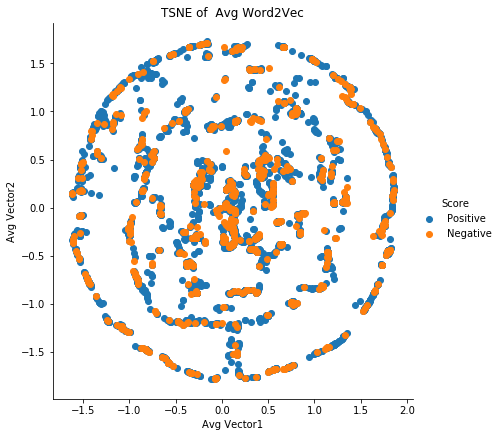

In [107]:
# Plotting
plt.close()
sns.FacetGrid(avg_w2v_final,hue="Score",size=6).map(plt.scatter,"Avg Vector1","Avg Vector2").add_legend()
plt.title("TSNE of  Avg Word2Vec")
plt.show()

### Observation:

* After applying TSNE on Avg Word2Vec, the Positive and Negative reviews are not well seperated. They are all Overlapped.

#### 5.5. TFIDF Word2vec

#### 5.5.1. Featurization of TFIDF Word2Vec

In [138]:
# References
# https://stackoverflow.com/questions/21553327
#https://github.com/devBOX03/Amazon-Fine-Food-Review/blob/master/k-NN%20on%20Amazon%20Fine%20Food%20Review(1)

from gensim.models import KeyedVectors
tfidf_w2v=tfidf_model.get_feature_names()
tfidf_w2v_vector=[]
row=0
for i in list_sentense:
    vec=np.zeros(50)
    weight_sum=0
    for w in i:
        try:
            w2v_freq=word2vec.wv[w]
            tfidf_freq=tfidf_data[row,tfidf_w2v.index(w)]
            vec=vec+(w2v_freq*tfidf_freq)
            weight_sum=weight_sum+tfidf_freq
        except:
            pass
    vec=vec/weight_sum
    tfidf_w2v_vector.append(vec)
    row=row+1
print("Size of TFIDF Word2vec")
print(len(tfidf_w2v_vector))
print("Size of Vector")
print(len(tfidf_w2v_vector[0]))

Size of TFIDF Word2vec
4986
Size of Vector
50


#### 5.5.2 TSNE of TFIDF WOrd2Vec

In [131]:
tfidf_w2v_model=TSNE(n_components=2,perplexity=50,n_iter=5000)
tfidf_w2v_data=tfidf_w2v_model.fit_transform(tfidf_w2v_vector)

In [132]:
tfidf_w2v_label=process_data.Score
tfidf_w2v_stack=np.vstack((tfidf_w2v_data.T,tfidf_w2v_label.T)).T

In [136]:
# Creating a Dataframe

tfidf_w2v_final=pd.DataFrame(tfidf_w2v_stack,columns=["Vector1","Vector2","Score"])
tfidf_w2v_final

,Vector1,Vector2,Score
0,-60.6273,16.5829,Positive
1,17.9789,39.1479,Negative
2,23.0682,32.8323,Positive
3,12.615,41.4668,Negative
4,31.8691,55.4703,Positive
5,27.8768,48.4843,Positive
6,-9.28643,25.628,Positive
7,1.32638,10.7104,Positive
8,11.2783,48.4372,Positive
9,-74.1679,-1.52088,Positive


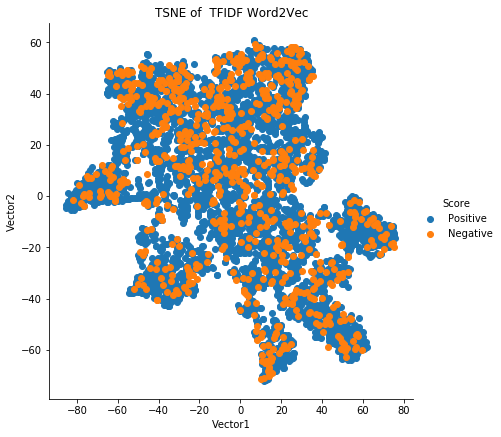

In [137]:
# Plotting
plt.close()
sns.FacetGrid(tfidf_w2v_final,hue="Score",size=6).map(plt.scatter,"Vector1","Vector2").add_legend()
plt.title("TSNE of  TFIDF Word2Vec")
plt.show()

### Observation:

* After applying TSNE on TFIDF Word2Vec, the Positive and Negative reviews are not well seperated. They are all Overlapped.

### 6. Conclusion:

* The Amazon Fine Food Review dataset have
    * Number of Reviews: 568,454
    * Number of columns: 10
    * Number of Class Labels: 5
* As for system requirements, We took 5k data points from 568,454
* After Data Cleaning the DataShape becomes(4986,10)
    * Positive: 4178
    * Negative: 808
* We Consider Text Column for further process of analysis of review either positive or negaaive
* After Text Preprocessing the preprocessed text are converted into the vectors using BOW,TFIDF,Avg Word2Vec,TFIDF Word2Vec
* For the Dimensionality Reduction, we use TSNE Technique.
* After applying TSNE, None of the method seperates the positive and negative reviews. From all the methods, the positive and negative reviews are overlapped
